In [12]:
import pandas as pd
import numpy as np

# Groups

## Obter as N linhas de cada grupo

In [7]:
df = pd.DataFrame({'id' : [1,1,1,2,2,3,3,3,3,4,4,5,6,6,6,7,7],
                'value'  : ["first","second","second","first",
                            "second","first","third","fourth",
                            "fifth","second","fifth","first",
                            "first","second","third","fourth","fifth"]})

In [8]:
df

,id,value
0,1,first
1,1,second
2,1,second
3,2,first
4,2,second
5,3,first
6,3,third
7,3,fourth
8,3,fifth
9,4,second


In [4]:
df.groupby('id').head(2)

,id,value
0,1,A
1,1,B
3,2,A
4,2,B
7,3,A
8,4,A


# Multindex

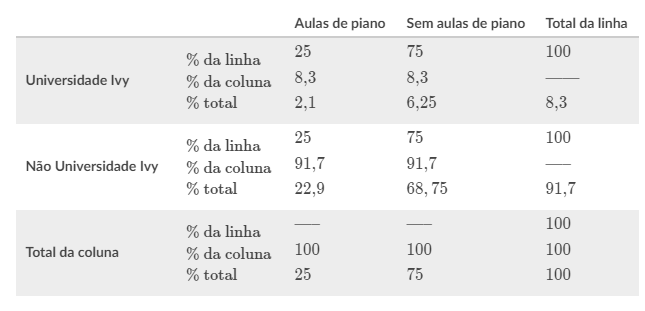

## Linhas

### Criação

In [16]:
univ = ('Universidade Ivy', 'Não Universidade Ivy', 'Total da coluna')
valores = ('% da linha', '% da coluna', 'total')
midx = pd.MultiIndex.from_product((univ, valores), names=['indice', 'valores'])
midx

MultiIndex([(    'Universidade Ivy',  '% da linha'),
            (    'Universidade Ivy', '% da coluna'),
            (    'Universidade Ivy',       'total'),
            ('Não Universidade Ivy',  '% da linha'),
            ('Não Universidade Ivy', '% da coluna'),
            ('Não Universidade Ivy',       'total'),
            (     'Total da coluna',  '% da linha'),
            (     'Total da coluna', '% da coluna'),
            (     'Total da coluna',       'total')],
           names=['indice', 'valores'])

In [17]:
pd.DataFrame({'Aulas de piano': (25, 8.3, 2.1, 25, 91.7, 22.9, np.NaN, 100, 25),
             'Sem aulas de piano': (75, 8.3, 6.25, 75, 91.7, 68.75, np.NaN, 100, 75),
              'Total da linha': (100, np.NaN, 8.3, 100, np.NaN, 91.7, 100, 100, 100)
             },
            index = midx)

Aulas de piano  Sem aulas de piano  \
indice               valores                                           
Universidade Ivy     % da linha             25.0               75.00   
                     % da coluna             8.3                8.30   
                     total                   2.1                6.25   
Não Universidade Ivy % da linha             25.0               75.00   
                     % da coluna            91.7               91.70   
                     total                  22.9               68.75   
Total da coluna      % da linha              NaN                 NaN   
                     % da coluna           100.0              100.00   
                     total                  25.0               75.00   

                                  Total da linha  
indice               valores                      
Universidade Ivy     % da linha            100.0  
                     % da coluna             NaN  
                     total                   8.3  
Não Universidade Ivy % da linha            100.0  
                     % da coluna             NaN  
                     total                  91.7  
Total da coluna      % da linha            100.0  
                     % da coluna           100.0  
                     total                 100.0

### Colunas

In [37]:
univ = ('Universidade Ivy', 'Não Universidade Ivy', 'Total da linha')
valores = ('% da coluna', '% da linha', 'total')
midx = pd.MultiIndex.from_product((univ, valores), names=['indice', 'valores'])
midx

MultiIndex([(    'Universidade Ivy', '% da coluna'),
            (    'Universidade Ivy',  '% da linha'),
            (    'Universidade Ivy',       'total'),
            ('Não Universidade Ivy', '% da coluna'),
            ('Não Universidade Ivy',  '% da linha'),
            ('Não Universidade Ivy',       'total'),
            (      'Total da linha', '% da coluna'),
            (      'Total da linha',  '% da linha'),
            (      'Total da linha',       'total')],
           names=['indice', 'valores'])

In [39]:
df = pd.DataFrame((
            (25, 8.3, 2.1, 25, 91.7, 22.9, np.NaN, 100, 25),
            (75, 8.3, 6.25, 75, 91.7, 68.75, np.NaN, 100, 75),
            (100, np.NaN, 8.3, 100, np.NaN, 91.7, 100, 100, 100)), 
            index = ('Aulas de piano', 'Sem aulas de piano', 'Total da coluna'),
            columns=midx)
df

indice             Universidade Ivy                  Não Universidade Ivy  \
valores                 % da coluna % da linha total          % da coluna   
Aulas de piano                   25        8.3  2.10                   25   
Sem aulas de piano               75        8.3  6.25                   75   
Total da coluna                 100        NaN  8.30                  100   

indice                               Total da linha                   
valores            % da linha  total    % da coluna % da linha total  
Aulas de piano           91.7  22.90            NaN        100    25  
Sem aulas de piano       91.7  68.75            NaN        100    75  
Total da coluna           NaN  91.70          100.0        100   100

### Operação elemento a elemento

In [40]:
df['Universidade Ivy'] + df['Não Universidade Ivy']

valores,% da coluna,% da linha,total
Aulas de piano,50,100.0,25.0
Sem aulas de piano,150,100.0,75.0
Total da coluna,200,NaN,100.0


# Categorias

## De dummies para categórico

In [50]:
df = pd.DataFrame({'Samsung': (np.NaN, 'x', np.NaN, np.NaN, 'x'),
                     'Apple': ('x', np.NaN, np.NaN, np.NaN, np.NaN),
                      'Asus': (np.NaN, np.NaN, 'x', np.NaN, np.NaN),
                    'Xiaomi': (np.NaN, np.NaN, np.NaN, 'x', np.NaN)},
                 index=('Fernanda', 'Cris', 'Luiz', 'Cecília', 'José'))
df

,Samsung,Apple,Asus,Xiaomi
Fernanda,NaN,x,NaN,NaN
Cris,x,NaN,NaN,NaN
Luiz,NaN,NaN,x,NaN
Cecília,NaN,NaN,NaN,x
José,x,NaN,NaN,NaN


In [51]:
_df = df.fillna(0).replace({'x': 1})
_df

,Samsung,Apple,Asus,Xiaomi
Fernanda,0,1,0,0
Cris,1,0,0,0
Luiz,0,0,1,0
Cecília,0,0,0,1
José,1,0,0,0


In [54]:
df['Marca'] = _df.idxmax(axis=1)
df

,Samsung,Apple,Asus,Xiaomi,Marca
Fernanda,NaN,x,NaN,NaN,Apple
Cris,x,NaN,NaN,NaN,Samsung
Luiz,NaN,NaN,x,NaN,Asus
Cecília,NaN,NaN,NaN,x,Xiaomi
José,x,NaN,NaN,NaN,Samsung
